# Cheat sheet

#### Models
1. Linear Regression
2. Locally Weighted Linear Regression
3. Logistic Regression
4. Softmax Regression
5. Gaussian Discriminant Analysis/(Multinomial Naive Bayes)
6. Support Vector Machines

#### Preprocessing
1. Standard Scaler
2. Min-Max Scaler
3. Polynomial Features
4. Split Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## **Models**

## 1. Linear Regression

In [112]:
class LinearRegressionModel:
#1. hypothesis function
    def h(self, X, theta):      
        hypothesis = X@theta
        return hypothesis
        
#2. cost function
    def cost(self, X, y, theta, average = False):
        #expects X to be a design matrix, y to be a column vector and theta to be a column vector
        if(average == False):
            J = 1/2*(self.h(X,theta)-y).T@(self.h(X,theta)-y)
        else:
            J = 1/(2*X.shape[0])*(self.h(X,theta)-y).T@(self.h(X,theta)-y)
        return J

#3. gradient function
    def gradient(self, X, y, theta, average = False):
        if(average == False):
            dJ = X.T@(self.h(X,theta)-y)
        else:
            dJ = X.T@(self.h(X,theta)-y)/(X.shape[0])
        return dJ
    
#4. batch gradient descent
    def batch_gd(self, X, y, initial_theta, max_iteration, alpha, tolerance = 0,average = False):
        cost = []
        theta = initial_theta
        iteration = 0
        cost.append(self.cost(X,y,theta,average))
        for n in range(max_iteration):
            gradient = self.gradient(X,y,theta,average)
            theta = theta - alpha*gradient
            cost.append(self.cost(X,y,theta,average))
            iteration += 1
        cost = np.array(cost)
        return theta,cost,iteration
    
#5. normal equation
    def normal_equation(self, X, y):
        theta = np.linalg.inv(X.T@X)@X.T@y
        return theta
            
#5. predict
    def predict(self,X,theta):
        prediction = self.h(X,theta)
        return prediction
    
#6. score/error calculation
    def mean_squared_error(self,X,y,theta):
        mse = self.cost(X,y,theta,average = True)*2
        return mse
        
#7. plotting cost
    def plot_cost(self,cost, iteration_no):
        iteration_series = np.arange(0,iteration_no+1)
        ax = plt.axes()
        ax.plot(iteration_series, cost)

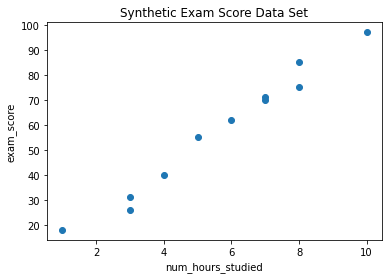

In [113]:
# Independent variable

num_hours_studied = np.array([1, 3, 3, 4, 5, 6, 7, 7, 8, 8, 10])

# Dependent variable

exam_score = np.array([18, 26, 31, 40, 55, 62, 71, 70, 75, 85, 97])

# Plot the data

plt.scatter(num_hours_studied, exam_score)
plt.xlabel('num_hours_studied')
plt.ylabel('exam_score')
plt.title('Synthetic Exam Score Data Set')
plt.show()

In [114]:
# Add dummy variable for intercept term to design matrix.
# Understand the numpy insert function by reading https://numpy.org/doc/stable/reference/generated/numpy.insert.html

X = np.array([num_hours_studied]).T
X = np.insert(X, 0, 1, axis=1)
y = exam_score
print(X.shape)
print(y.shape)

(11, 2)
(11,)


In [139]:
LR = LinearRegressionModel()

alpha = 0.001
max_iteration = 500
initial_theta = np.zeros(2)

theta,cost,iteration = LR.batch_gd(X,y,initial_theta,max_iteration,alpha,average = True)

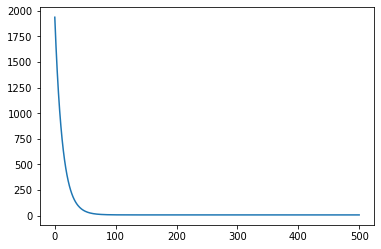

In [140]:
LR.plot_cost(cost,iteration)

In [141]:
theta2 = LR.normal_equation(X,y)
print(theta)
print(LR.mean_squared_error(X,y,theta))
print(theta2)
print(LR.mean_squared_error(X,y,theta2))

[1.67736309 9.78605174]
13.434657448478275
[4.27819549 9.40225564]
12.271701982228299


In [142]:
x_series = np.linspace(0,10,100)
print(x_series.shape)
x_series = np.insert(x_series[:,np.newaxis],0,1, axis=1)
print(x_series.shape)
y_pred = LR.predict(x_series, theta)
y_pred2 = LR.predict(x_series,theta2)

(100,)
(100, 2)


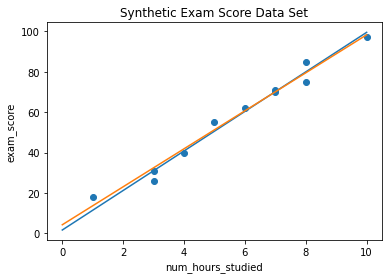

In [143]:
plt.scatter(num_hours_studied, exam_score)
plt.plot(x_series[:,1],y_pred)
plt.plot(x_series[:,1],y_pred2)
plt.xlabel('num_hours_studied')
plt.ylabel('exam_score')
plt.title('Synthetic Exam Score Data Set')
plt.show()

## 2. Locally Weighted Linear Regression

In [148]:
class LWLRModel:
#1. hypothesis function
    def h(self, X, theta):      
        hypothesis = X@theta
        return hypothesis
    
#2. Weights
    def w(self,X,x,tau):
        w = np.exp(-(np.sum(((X-x)**2),axis=1)/(2*(tau**2))))
        return w
    
#5. normal equation
    def normal_equation(self, X, y, w):
        W = np.diag(w)
        theta = np.linalg.inv(X.T@W@X)@X.T@W@y
        return theta
            
#5. predict
    def predict_point(self,X,x,tau):
        w = self.w(X,x,tau)
        theta = self.normal_equation(X, y, w)
        prediction = self.h(x,theta)
        return prediction
    
    def predict_multiple(self,X,x,tau):
        m_pred = x.shape[0]
        predictions = []
        for ix in range(m_pred):
            xx = x[ix]
            predictions.append(self.predict_point(X,xx,tau))
        predictions = np.array(predictions)
        return predictions

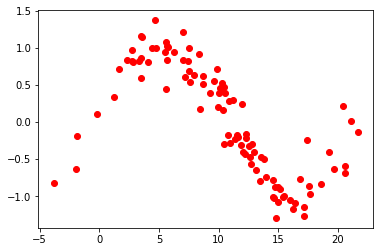

In [149]:
n = 100
x = np.random.normal(10, 5, [n,1])
y = np.sin(x/3.5) + np.random.normal(0,0.2, [n,1])

plt.plot(x,y,'ro')

In [150]:
X = np.insert(x,0,1,axis=1)

LWLR = LWLRModel()
LWLR.predict_point(X,np.array([1,4]),1)

array([0.93837341])

In [151]:
x_series = np.linspace(-5,20,100)
x_series = np.insert(x_series[:,np.newaxis],0,1,axis=1)
print(x_series.shape)

y_pred = LWLR.predict_multiple(X,x_series,2)

(100, 2)


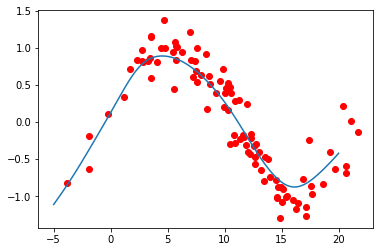

In [152]:
plt.plot(x,y,'ro')
plt.plot(x_series[:,1],y_pred)

## 3. Logistic Regression

In [161]:
class LogisticRegressionModel:
#1. hypothesis function
    def h(self, X, theta):      
        hypothesis = 1/(1+np.exp(-X@theta))
        return hypothesis
        
#2. cost function
    def cost(self, X, y, theta, average = False):
        #expects X to be a design matrix, y to be a column vector and theta to be a column vector
        if(average == False):
            J = -(y.T@np.log(self.h(X,theta)) + (1-y).T@np.log(1-self.h(X,theta)))
        else:
            J = -(y.T@np.log(self.h(X,theta)) + (1-y).T@np.log(1-self.h(X,theta)))/(X.shape[0])
        return J

#3. gradient function
    def gradient(self, X, y, theta, average = False):
        if(average == False):
            dJ = -X.T@(y-self.h(X,theta))
        else:
            dJ = -X.T@(y-self.h(X,theta))/(X.shape[0])
        return dJ
    
    def hessian(self, X, theta, average = False):
        y_pred = self.h(X,theta)
        if(average == False):
            hess_mat = X.T@X*(y_pred@(1-y_pred))
        else:
            hess_mat = X.T@X*(y_pred@(1-y_pred))/X.shape[0]
        return hess_mat
    
#4. batch gradient descent
    def batch_gd(self, X, y, initial_theta, max_iteration, alpha, tolerance = 0,average = False):
        cost = []
        theta = initial_theta
        iteration = 0
        cost.append(self.cost(X,y,theta,average))
        for n in range(max_iteration):
            gradient = self.gradient(X,y,theta,average)
            theta = theta - alpha*gradient
            cost.append(self.cost(X,y,theta,average))
            iteration += 1
        cost = np.array(cost)
        return theta,cost,iteration
    
    def newtons_method(self, X, y, initial_theta, max_iteration,average = False):
        cost = []
        theta = initial_theta
        iteration = 0
        cost.append(self.cost(X,y,theta,average))
        for n in range(max_iteration):
            gradient = self.gradient(X,y,theta,average)
            hessian = self.hessian(X,theta,average)
            theta = theta - np.linalg.inv(hessian)@gradient
            cost.append(self.cost(X,y,theta,average))
            iteration += 1
        cost = np.array(cost)
        return theta,cost,iteration
    
#5. predict
    def predict(self,X,theta):
        prediction = self.h(X,theta)
        prediction[prediction >= 0.5] = 1
        prediction[prediction < 0.5] = 0
        return prediction
    
#6. score/error calculation
    def r_squared(self,y,y_pred):
        r_square = 1 - ((np.square(y - y_pred)).sum())/((np.square(y - y.mean())).sum())
        return r_square
    
    def accuracy(self,y,y_pred):
        acc = (y == y_pred).sum()/y.size
        return acc
    
#7. plotting cost
    def plot_cost(self,cost, iteration_no):
        iteration_series = np.arange(0,iteration_no+1)
        ax = plt.axes()
        ax.plot(iteration_series, cost)

In [162]:
data = np.loadtxt('ex2data1.txt',delimiter = ',')

In [163]:
X = data[:,0:2]
y = data[:,2]

mean = np.mean(X,axis=0)
std = np.std(X,axis=0)

X = (X-mean)/std

X = np.insert(X,0,1,axis=1)

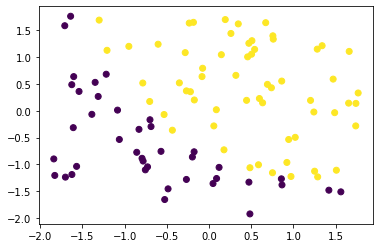

In [164]:
plt.scatter(X[:,1],X[:,2],c=y)

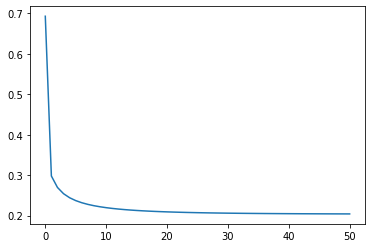

In [165]:
Log = LogisticRegressionModel()

iterations = 50
alpha = 5
initial_theta = np.zeros(3)

theta,cost,iteration_no = Log.batch_gd(X,y,initial_theta,iterations,alpha,average=True)

Log.plot_cost(cost,iteration_no)

In [166]:
y_pred = Log.predict(X,theta)
Log.accuracy(y,y_pred)

0.89

In [167]:
cost[-1]

0.2040756340460184

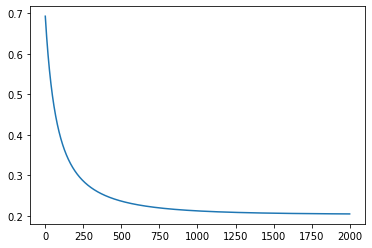

In [168]:
iterations = 2000

theta,cost,iteration_no = Log.newtons_method(X,y,initial_theta,iterations,average=True)

Log.plot_cost(cost,iteration_no)

In [169]:
y_pred = Log.predict(X,theta)
Log.accuracy(y,y_pred)

0.89

In [170]:
cost[-1]

0.20444214876081593

## 4. Softmax Regression


In [171]:
class SoftmaxRegressionModel:
    def Y(self,y):
        m = len(y)
        k = len(np.unique(y))
        Y = np.zeros((m,k))
        for j,kk in enumerate(np.unique(y)):
            Y[y==kk,j] = 1
        return Y
    
    def y(self,Y):
        y = np.argmax(Y,axis=1)
        return y
    
#1. hypothesis function
    def h(self, X, theta):      
        hypothesis = np.exp(X@theta)/np.sum(np.exp(X@theta),axis=1)[:,np.newaxis]
        return hypothesis
        
#2. cost function
    def cost(self, X, y, theta, average = False):
        #expects X to be a design matrix, y to be a column vector and theta to be a column vector
        if(average == False):
            J = -np.sum(y*np.log(self.h(X,theta)))
        else:
            J = -np.sum(y*np.log(self.h(X,theta)))/(X.shape[0])
        return J

#3. gradient function
    def gradient(self, X, y, theta, average = False):
        if(average == False):
            dJ = -X.T@(y-self.h(X,theta))
        else:
            dJ = -X.T@(y-self.h(X,theta))/(X.shape[0])
        return dJ
    
#4. batch gradient descent
    def batch_gd(self, X, y, initial_theta, max_iteration, alpha, tolerance = 0,average = False):
        cost = []
        theta = initial_theta
        iteration = 0
        cost.append(self.cost(X,y,theta,average))
        for n in range(max_iteration):
            gradient = self.gradient(X,y,theta,average)
            theta = theta - alpha*gradient
            cost.append(self.cost(X,y,theta,average))
            iteration += 1
        cost = np.array(cost)
        return theta,cost,iteration
    
#5. predict
    def predict_Y(self,X,theta):
        prediction = self.h(X,theta)
        prediction = prediction/np.max(prediction,axis=1)[:,np.newaxis]
        prediction[prediction < 1] = 0
        return prediction
    
    def predict_y(self,X,theta):
        prediction = self.h(X,theta)
        y = self.y(prediction)
        return y
    
#6. score/error calculation
    def accuracy(self,y,y_pred):
        acc = np.sum(y == y_pred)/y.size
        return acc
    
#7. plotting cost
    def plot_cost(self,cost, iteration_no):
        iteration_series = np.arange(0,iteration_no+1)
        ax = plt.axes()
        ax.plot(iteration_series, cost)

In [172]:
#IMPORT DATA
import pandas as pd

def replaceKeys(series):
    series_dict = {}
    for i,u in enumerate(series.unique()):
        series_dict[u] = i
    return series.replace(series_dict), series_dict

data = pd.read_csv("gender_height_weight.csv") 

gender_dict = {}
data['Gender'], gender_dict = replaceKeys(data['Gender'])
print(data.columns)

Index(['Gender', 'Height', 'Weight', 'Index'], dtype='object')


In [173]:
#Split Data

X_all = (data[['Gender','Height','Weight']]).dropna().astype(float)
columns = X_all.columns

ix = np.arange(0,X_all.shape[0])
np.random.shuffle(ix)
percentage = 0.7

X_train = X_all[:int(percentage*X_all.shape[0])]
X_test = X_all[int(percentage*X_all.shape[0]):]

mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_norm = (X_train-mean)/std
X_norm_test = (X_test-mean)/std
X_norm.insert(0,"Intercept",1)
X_norm_test.insert(0,"intercept",1)

print(X_norm.head())
print()
y = data['Index'].astype(float)
print(y.head())
y_train = y[:int(percentage*X_all.shape[0])]
y_test = y[int(percentage*X_all.shape[0]):]

m,n = X_norm.shape

k = y.unique().size

   Intercept    Gender    Height    Weight
0          1 -0.994302  0.228220 -0.313398
1          1 -0.994302  1.137980 -0.596102
2          1  1.005731  0.895377  0.126364
3          1  1.005731  1.501884 -0.062105
4          1 -0.994302 -1.288047 -1.412804

0    4.0
1    2.0
2    4.0
3    3.0
4    3.0
Name: Index, dtype: float64


In [174]:

k = len(y.unique())

if (X_train.shape[1] == X.shape[1]): 
    X_train.insert(0, "intercept", 1)

# Reset m and n for training data

m, n = X_train.shape

# Initialize theta for each class  

In [175]:
SR = SoftmaxRegressionModel()

yy = SR.Y(y_train.values)

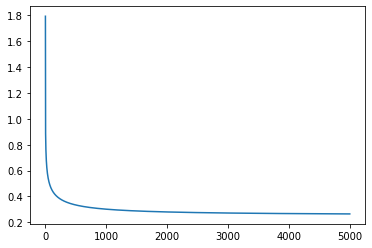

In [179]:
theta_initial = np.ones((n,k))

alpha = 5
iterations = 5000

theta,cost,iteration_no = SR.batch_gd(X_norm.values,yy,theta_initial,iterations,alpha,average=True)
SR.plot_cost(cost,iteration_no)

In [181]:
y_pred = SR.predict_y(X_norm_test.values,theta)

In [182]:
SR.accuracy(y_pred, y_test.values)

0.9333333333333333

## 5. Gaussian Discriminant Analysis

In [31]:
class GDAModel:
    
    def parameters(self,X,y,naive = False,same_sigma = True):
        unique_y = np.unique(y)
        prior = np.zeros(len(unique_y))
        mean = np.zeros((len(unique_y),X.shape[1]))
        sigma = np.zeros((len(unique_y),X.shape[1],X.shape[1]))
        for j, yi in enumerate(unique_y):
            prior[j] = np.sum(y==yi)/y.size
            mean[j] = np.mean(X[y==yi],axis=0)
            sigma[j] = (1/np.sum(y==yi))*(X[y==yi]-mean[j]).T@(X[y==yi]-mean[j])
            
        # sets 0 to covariance terms if using the naive assumption
        if(naive == True):
            sigma[:,~np.eye(X.shape[1],dtype=bool)] = 0
            
        # if we're using the same sigma for all classes, we take the average of them
        if(same_sigma == True):
            sigma[:] = np.mean(sigma,axis=0)
            
        return prior,mean,sigma,unique_y
    
    def joint_probability(self,x,prior,mean,sigma):
        joint_prob = np.zeros(prior.size)
        for j,mu in enumerate(mean):
            if(sigma.ndim == 2):
                sig = sigma
            else:
                sig = sigma[j]
            gaussian = (1/(((2*np.pi)**(x.size/2))*np.sqrt(np.linalg.det(sig))))*np.exp(-1/2*(x-mu)@np.linalg.inv(sig)@((x-mu)))
            joint_prob[j] = prior[j]*gaussian
        return joint_prob

    def predict(self,X,prior,mean,sigma,unique_y):
        if(X.ndim == 2):
            y_pred = []
            for i in range(X.shape[0]):
                joint_prob = self.joint_probability(X[i],prior,mean,sigma)
                y_pred.append(unique_y[np.argmax(joint_prob)])
            y_pred = np.array(y_pred)
        else:
            joint_prob = self.joint_probability(X,prior,mean,sigma)
            y_pred = unique_y[np.argmax(joint_prob)]
        return y_pred

#6. score/error calculation
    def accuracy(self,y,y_pred):
        acc = np.sum(y == y_pred)/y.size
        return acc

In [32]:
from sklearn.model_selection import train_test_split

# Load data from CSV file
def loadCsv(filename):
    data_raw = pd.read_csv(filename)
    headers = data_raw.columns
    dataset = data_raw.values
    return dataset, headers

def splitDataset(test_size,*arrays,**kwargs):
    return train_test_split(*arrays,test_size=test_size,**kwargs)

filename = 'diabetes.csv'
dataset, headers = loadCsv(filename)

X_train,X_test,y_train,y_test = splitDataset(0.4,dataset[:,:-1],dataset[:,-1])
print("Total =",len(dataset),"Train =", len(X_train),"Test =",len(X_test))

Total = 768 Train = 460 Test = 308


In [33]:
GDA = GDAModel()

prior,mean,sigma,unique_y = GDA.parameters(X_train,y_train,naive=False,same_sigma=True)

In [34]:
y_pred = GDA.predict(X_test,prior,mean,sigma,unique_y)

In [35]:
GDA.accuracy(y_pred,y_test)

0.7922077922077922

## 6. Multinomial Naive Bayes

In [36]:
class MultinomialNaiveBayesModel:
    
    #1. Get frequencies -> dictionary of frequencies (used for creating the conditional probabilities, and also for getting the frequencies of each sample)
    #2. get parmaters -> from the frequency dictionary and y, get the prior, likelihood(conditional probability), and also the unique values of y
    #3. get joint_probability -> finds the joint probability for each of the class
    #4. predict -> uses the joint_probability function to find the probabilities of each class, then choses the class
    #5. accuracy -> takes in y and y_pred to get the accuracy. 
    
    def frequency_dict(self,dict_of_instances):
        from collections import Counter
        #takes in a list
        frequency_dict = {}
        for key,value in dict_of_instances.items():
            frequency_dict[key] = Counter(dict_of_instances[key])
        return frequency_dict
    
    def parameters(self,frequency_dict,y,alpha = 0):
        #expects X is a list of counter dictionaries
        unique_y = np.unique(y)
        prior = {}
        likelihood = {}
        
        for j,class_name in enumerate(unique_y):
            prior[class_name] = np.sum(y==unique_y[j])/y.size
            total_frequency = sum(frequency_dict[class_name].values())
            conditional_dictionary = {}
            for key,value in frequency_dict[class_name].items():
                conditional_dictionary[key] = (value+alpha)/(total_frequency+alpha*(len(frequency_dict[class_name])))
            conditional_dictionary["* unknown *"] = alpha/(total_frequency+alpha*(len(frequency_dict[class_name])))
            likelihood[class_name] = (conditional_dictionary)

        return prior,likelihood,unique_y
    
    def joint_probability(self,x,prior,likelihood):
        #similar to the function parameters, x is expected to be the frequency of each class
        joint_prob = np.zeros(len(prior))
        for j,(key,p_y) in enumerate(prior.items()):
            px_y = 1
            for xi in x:
                try:
                    px_y *= likelihood[key][xi]
                except:
                    px_y *= likelihood[key]["* unknown *"]
            joint_prob[j] = p_y*px_y
        return joint_prob

    def predict(self,X,prior,likelihood,unique_y):
        y_pred = []
        for i in range(len(X)):
            joint_prob = self.joint_probability(X[i],prior,likelihood)
            y_pred.append(unique_y[np.argmax(joint_prob)])
        y_pred = np.array(y_pred)
        return y_pred

#6. score/error calculation
    def accuracy(self,y,y_pred):
        acc = np.sum(y == y_pred)/y.size
        return acc

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from collections import Counter
import nltk
import string
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /home/rom/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
raw_data = pd.read_csv('spam.csv', encoding='latin-1')
raw_data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)
raw_data = raw_data.rename(columns={'v1': 'class','v2': 'sentence'})

raw_data.head()

,class,sentence
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [39]:
def get_words(sentence):
    '''
    What will be covered:
    1. Remove punctuation
    2. Remove stopwords
    3. Return list of clean text words
    '''
    
    #1
    nopunc = [char for char in sentence if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    #2
    clean_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    
    #3
    return clean_words
#raw_data['sentence'].apply(process_text).head()
#raw_data

In [40]:
train_data, test_data = train_test_split(raw_data.iloc[:,[0,1]], test_size = 0.2)
train_data.head()

,class,sentence
3855,ham,I'm ok. Will do my part tomorrow
4630,ham,"Got hella gas money, want to go on a grand nat..."
3208,ham,Havent mus ask if u can 1st wat. Of meet 4 lun...
472,ham,Nothing. I meant that once the money enters yo...
2124,ham,Beautiful Truth against Gravity.. Read careful...


In [41]:
X_raw = train_data['sentence']
print(X_raw.values.shape)

(4457,)


In [42]:
ham_docs = [train['sentence'] for index,train in train_data.iterrows() if train['class'] == 'ham']
spam_docs = [train['sentence'] for index,train in train_data.iterrows() if train['class'] == 'spam']

In [43]:
spam_words = get_words(spam_docs)
ham_words = get_words(ham_docs)

In [44]:
X = {"ham":ham_words,"spam":spam_words}

In [45]:
MNB = MultinomialNaiveBayesModel()
tab = MNB.frequency_dict(X)

In [46]:
prior,likelihood,unique_y = MNB.parameters(tab,train_data['class'].values,alpha=0.0001)

In [47]:
test_docs = list([test['sentence'] for index,test in test_data.iterrows()])
X_test = [get_words(sentence) for sentence in test_docs]
#X_test = MNB.frequency_list(test_words)
#y = test_data['class'].values

In [48]:
y_pred = MNB.predict(X_test,prior,likelihood,unique_y)

In [49]:
print(y_pred[:100])

['ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'spam' 'ham' 'ham' 'ham' 'ham' 'ham'
 'ham' 'ham' 'ham' 'spam' 'spam' 'ham' 'ham' 'ham' 'ham' 'ham' 'spam'
 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham'
 'spam' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham'
 'spam' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham'
 'ham' 'ham' 'spam' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham'
 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'spam' 'ham' 'spam' 'spam'
 'ham' 'ham' 'spam' 'ham' 'ham' 'ham' 'ham' 'ham' 'spam' 'ham' 'spam'
 'ham' 'ham' 'ham' 'ham' 'ham' 'spam' 'ham']


In [50]:
y = test_data['class'].values
print(y[:100])

['ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'spam' 'ham' 'ham' 'ham' 'spam' 'ham'
 'ham' 'ham' 'ham' 'spam' 'spam' 'ham' 'ham' 'ham' 'ham' 'ham' 'spam'
 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'spam' 'ham' 'ham' 'spam'
 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham'
 'spam' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham'
 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham'
 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'spam' 'ham' 'spam' 'ham' 'ham'
 'ham' 'spam' 'ham' 'ham' 'ham' 'ham' 'ham' 'spam' 'ham' 'spam' 'ham'
 'ham' 'ham' 'ham' 'ham' 'spam' 'spam']


In [51]:
MNB.accuracy(y,y_pred)

0.9605381165919282

## 7. SVM

In [183]:
class SVMModel:
    
    def cvxopt_solve_qp(self,Q, c, A=None, b=None, E=None, d=None):
        import cvxopt
        Q = .5 * (Q + Q.T)  # make sure Q is symmetric
        args = [cvxopt.matrix(Q), cvxopt.matrix(c)]
        if A is not None:
            args.extend([cvxopt.matrix(A), cvxopt.matrix(b)])
            if E is not None:
                args.extend([cvxopt.matrix(E), cvxopt.matrix(d)])
        sol = cvxopt.solvers.qp(*args)
        if 'optimal' not in sol['status']:
            return None
        return np.array(sol['x']).reshape((Q.shape[1],))

    def gauss_kernel(self,X,sigma=0.2):
        m = X.shape[0];
        K = np.matrix(np.zeros([m,m]));
        for i in range(0,m):
            for j in range(0,m):
                K[i,j] = (X[i,:] - X[j,:]).reshape(1,-1) @ (X[i,:] - X[j,:]).reshape(-1,1)
        K = np.exp(-K/(2*sigma*sigma))      
        return K;

    def linear_kernel(self,X):
        m = X.shape[0];
        K = np.matrix(np.zeros([m,m]));
        for i in range(0,m):
            for j in range(0,m):
                K[i,j] = (X[i,:].reshape(1,-1)@X[j,:].reshape(-1,1))
        return K;

    def get_wb(self,X, y, alpha,K):
        # Find the support vectors
        S = alpha > 1e-6
        XS = X[S,:]
        yS = y[S]
        alphaS = alpha[S]
        alphaSyS = np.tile(np.multiply(yS.T, alphaS).T, X.shape[1])
        w = sum(np.multiply(alphaSyS, XS)).T
        # Find b
        KS = K[S,:][:,S]
        NS = yS.shape[0]
        b = (np.sum(yS) - np.sum(np.multiply(alphaS,yS.T)*KS))/NS
        # Normalize w,b
        scalef = np.linalg.norm(w)
        w = w / scalef
        b = b / scalef
        return w,b

    def plot_w(self,w,b):
        ylim = plt.axes().get_ylim()
        xlim = plt.axes().get_xlim()
        p1 = (xlim[0], - (w[0,0] * xlim[0] + b) / w[1,0])
        p2 = (xlim[1], - (w[0,0] * xlim[1] + b) / w[1,0])
        plt.plot((p1[0],p2[0]), (p1[1],p2[1]), 'r-')
        
    def optimize(self,X,y,kernel='gaussian',sigma=0.2):
        if(kernel == 'gaussian'):
            K = self.gauss_kernel(X,sigma)
        elif(kernel=='linear'):
            K = self.linear_kernel(X)
        else:
            print("No such kernel")
            return None
        m = y.size
        Q = np.multiply(y * y.T, K)
        print('Q rank: %d' % np.linalg.matrix_rank(Q))
        c = -np.ones(m);
        A = -np.eye(m);
        b = np.zeros(m);
        E = y.T;
        d = np.zeros(1);
        alpha_star = self.cvxopt_solve_qp(Q, c, A, b, E, d);
        print("Optimal alpha:")
        print(alpha_star)

        w,b = self.get_wb(X, y, alpha_star,K)
        w = w.reshape(-1,1)
        print(w.shape)
        print("Optimal w: [%f,%f] b: %f" % (w[0],w[1],b))
        return alpha_star,w,b
    
    def predict_linear(self, x, w, b):
        s = x@w + b
        s[s >= 0] = 1
        s[s < 0] = -1
        return s
    
    def predict_gaussian(self,x,X,y,alpha):
        s = []
        sigma = 0.2
        for j in range(x.shape[0]):
            ss = 0
            for i in range(X.shape[0]):
                ss += alpha[i]*y[i]*np.exp((-(X[i]-x[j])@(X[i]-x[j]))/(2*sigma*sigma))
            s.append(ss)
        s = np.array(s)
        s[s >= 0] = 1
        s[s < 0] = -1
        return s
    
    def accuracy(self,y,y_pred):
            acc = np.sum(y == y_pred)/y.size
            return acc

In [53]:
# Generate data for class 1

mu_1 = np.array([1.0, 2.0])
sigma_1 = 1
num_sample = 100
cov_mat = np.matrix([[sigma_1,0],[0,sigma_1]])
X1 = np.random.multivariate_normal(mean= mu_1, cov=cov_mat, size = num_sample)
#X1[0] = np.array([8,8])

# Generate data for class 2

angle = np.random.uniform(0, 2*np.pi, num_sample)
d =  np.random.normal(np.square(3*sigma_1),np.square(.5*sigma_1),num_sample)
X2 = np.array([X1[:,0] + d*np.cos(angle), X1[:,1] + d*np.sin(angle)]).T

# Combine X1 and X2 into single dataset

X = np.concatenate([X1, X2],axis = 0)
y = np.append(-np.ones(num_sample),np.ones(num_sample))[:,np.newaxis]

In [54]:
SVM = SVMModel()

alpha,w,b = SVM.optimize(X,y,sigma=1)

Q rank: 191
     pcost       dcost       gap    pres   dres
 0: -9.6971e+00 -3.2643e+01  3e+02  1e+01  2e+00
 1: -2.9048e+00 -3.3132e+01  3e+01  4e-15  6e-16
 2: -1.0051e+01 -1.4088e+01  4e+00  6e-15  6e-16
 3: -1.0649e+01 -1.1600e+01  1e+00  2e-15  3e-16
 4: -1.0858e+01 -1.1033e+01  2e-01  4e-15  3e-16
 5: -1.0899e+01 -1.0997e+01  1e-01  2e-15  3e-16
 6: -1.0921e+01 -1.0954e+01  3e-02  4e-15  3e-16
 7: -1.0932e+01 -1.0939e+01  7e-03  6e-15  3e-16
 8: -1.0935e+01 -1.0936e+01  4e-04  2e-15  3e-16
 9: -1.0935e+01 -1.0935e+01  3e-05  8e-16  3e-16
10: -1.0935e+01 -1.0935e+01  4e-07  1e-15  3e-16
Optimal solution found.
Optimal alpha:
[2.50874112e-08 1.28157136e-07 2.86789882e-08 1.81066678e-08
 3.58205688e-08 9.33145257e-07 1.09687083e-01 1.84130135e-08
 1.22361693e-08 2.17724694e-08 8.01660254e-07 1.31589417e+00
 2.46507254e-08 6.56780599e-08 3.27638665e-08 3.09771916e-08
 3.31808119e-08 4.84779727e-08 6.05585109e-08 1.20064217e-08
 4.25831131e-08 3.87908717e-08 1.14615805e+00 1.11119199e

In [55]:
x_series = np.linspace(-20,20,100)
y_series = np.linspace(-20,20,100)

x_mesh,y_mesh = np.meshgrid(x_series,y_series)

x_mesh = x_mesh.reshape(-1,1)
y_mesh = y_mesh.reshape(-1,1)

mesh = np.append(x_mesh,y_mesh,axis=1)
y_pred = SVM.predict_gaussian(mesh,X,y,alpha)

x_mesh = x_mesh.reshape(100,100)
y_mesh = y_mesh.reshape(100,100)
y_pred = y_pred.reshape(100,100)

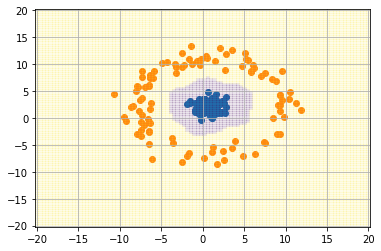

In [56]:
plt.scatter(X1[:,0],X1[:,1])
plt.scatter(X2[:,0],X2[:,1])
plt.pcolormesh(x_mesh,y_mesh,y_pred,cmap='viridis',shading='auto',alpha=0.1)
plt.grid(True)

## **Preprocessing**

## 1. Standard Scaler

In [190]:
def standardScaler(X):
    mean = np.mean(X,axis=0)
    std = np.std(X,axis=0)
    X_norm = (X-mean)/std
    return X_norm, mean, std

def standardUnScaler(X, mean, std):
    X_unscaled = X*std+mean
    return X_unscaled

X = np.array([[1,2],[3,4],[5,6]])
X_norm,mean,std = standardScaler(X)
print(X_norm)

[[-1.22474487 -1.22474487]
 [ 0.          0.        ]
 [ 1.22474487  1.22474487]]


## 2. Min-Max Scaler

In [191]:
def minMaxScaler(X):
    mini = np.min(X,axis=0)
    maxi = np.max(X,axis=0)
    X_scaled = (X-mini)/(maxi-mini)
    return X_scaled, mini, maxi

def minMaxUnScaler(X, mini, maxi):
    X_unscaled = X*(maxi-mini)+mini
    return X_unscaled

X = np.array([[1,2],[3,4],[5,6]])
X_scaled,mini,maxi = minMaxScaler(X)
print(X_scaled)

[[0.  0. ]
 [0.5 0.5]
 [1.  1. ]]


## Polynomial Features

In [189]:
from sklearn.preprocessing import PolynomialFeatures

def getPolynomialFeatures(X,degree):
    poly = PolynomialFeatures(degree)
    return poly.fit_transform(X)

X = np.array([[1,2],[3,4],[5,6]])

getPolynomialFeatures(X,3)

array([[  1.,   1.,   2.,   1.,   2.,   4.,   1.,   2.,   4.,   8.],
       [  1.,   3.,   4.,   9.,  12.,  16.,  27.,  36.,  48.,  64.],
       [  1.,   5.,   6.,  25.,  30.,  36., 125., 150., 180., 216.]])

## Train Test Splitter

In [275]:
from sklearn.model_selection import train_test_split

def trainTestSplit(X,y,test_size=0.2,random_state=1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,random_state=random_state)
    return X_train,X_test,y_train,y_test

X, y = np.arange(100).reshape((50, 2)), range(50)
X_train, X_test, y_train, y_test = trainTestSplit(X,y,test_size=0.3,random_state=None)

print("Shape Test:",X_test.shape[0]/(X_train.shape[0]+X_test.shape[0]))

Shape Test: 0.3
